In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

# Artificial neurons

## The pytorch nn module

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  8,  6, 10,  4,  7,  9,  0,  1]), tensor([2, 5]))

In [5]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [24]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[2.8917],
        [2.4707]], grad_fn=<AddmmBackward>)

In [25]:
linear_model.weight

Parameter containing:
tensor([[0.4527]], requires_grad=True)

In [26]:
linear_model.bias

Parameter containing:
tensor([0.2572], requires_grad=True)

In [27]:
x = torch.ones(1)
linear_model(x)

tensor([0.7098], grad_fn=<AddBackward0>)

In [28]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.7098],
        [0.7098],
        [0.7098],
        [0.7098],
        [0.7098],
        [0.7098],
        [0.7098],
        [0.7098],
        [0.7098],
        [0.7098]], grad_fn=<AddmmBackward>)

In [31]:
linear_model.parameters()

<generator object Module.parameters at 0x7fca3c876970>

In [32]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.5605]], requires_grad=True),
 Parameter containing:
 tensor([0.6511], requires_grad=True)]

In [34]:
def loss_fn(predicted_label, label):
    return torch.mean((predicted_label - label)**2)

In [35]:
def calc_forward(model, data, label, is_train):
    with torch.set_grad_enabled(is_train):
        data_p = model(data)
        loss = loss_fn(data_p, label)
    return loss

In [48]:
def training_loop(n_epochs, model, optimizer, train_data, train_label, val_data, val_label):
    for epoch in range(1, n_epochs + 1):
        train_p = model(train_data)
        train_loss = loss_fn(train_p, train_label)
        
        with torch.no_grad():
            val_p = model(val_data)
            val_loss = loss_fn(val_p, val_label)
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
            
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epoch {epoch}, Training loss {train_loss:.4f}, Validation loss {val_loss:.4f}')

In [49]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(n_epochs=3000,
              model=linear_model,
              optimizer=optimizer,
              train_data=t_un_train, train_label = t_c_train,
              val_data=t_un_val, val_label=t_c_val)

Epoch 1, Training loss 138.5208, Validation loss 92.2610
Epoch 1000, Training loss 3.8882, Validation loss 1.4545
Epoch 2000, Training loss 3.3588, Validation loss 1.0941
Epoch 3000, Training loss 3.3497, Validation loss 1.0532


In [50]:
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[5.3265]], requires_grad=True)
Parameter containing:
tensor([-17.1023], requires_grad=True)


In [51]:
def training_loop(n_epochs, model, optimizer, train_data, train_label, val_data, val_label):
    for epoch in range(1, n_epochs + 1):
        train_loss = calc_forward(model, train_data, train_label, True)
        val_loss = calc_forward(model, val_data, val_label, False)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
                    
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epoch {epoch}, Training loss {train_loss:.4f}, Validation loss {val_loss:.4f}')

In [52]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(n_epochs=3000,
              model=linear_model,
              optimizer=optimizer,
              train_data=t_un_train, train_label = t_c_train,
              val_data=t_un_val, val_label=t_c_val)

Epoch 1, Training loss 263.0869, Validation loss 203.6483
Epoch 1000, Training loss 3.9286, Validation loss 1.4716
Epoch 2000, Training loss 3.3594, Validation loss 1.0959
Epoch 3000, Training loss 3.3497, Validation loss 1.0534


In [53]:
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[5.3262]], requires_grad=True)
Parameter containing:
tensor([-17.1008], requires_grad=True)


# Finally a neural network

## Replacing the linear model

In [54]:
seq_model = nn.Sequential(nn.Linear(1, 13),
                          nn.Tanh(),
                          nn.Linear(13, 1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

## Inspecting the parameters

In [55]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [56]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [63]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [64]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [65]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1334], requires_grad=True)

In [66]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(n_epochs=3000,
              model=seq_model,
              optimizer=optimizer,
              train_data=t_un_train, train_label = t_c_train,
              val_data=t_un_val, val_label=t_c_val)

Epoch 1, Training loss 197.3825, Validation loss 147.3612
Epoch 1000, Training loss 4.9119, Validation loss 0.6396
Epoch 2000, Training loss 3.3381, Validation loss 0.0892
Epoch 3000, Training loss 2.1229, Validation loss 0.7865


In [67]:
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

output tensor([[12.4886],
        [ 6.9177]], grad_fn=<AddmmBackward>)
answer tensor([[15.],
        [ 8.]])
hidden tensor([[-17.2161],
        [  1.5556],
        [ -0.0229],
        [  1.6502],
        [ -1.9056],
        [ 17.0199],
        [  2.1285],
        [-17.5416]])


## Comparing to the linear model

In [68]:
from matplotlib import pyplot as plt

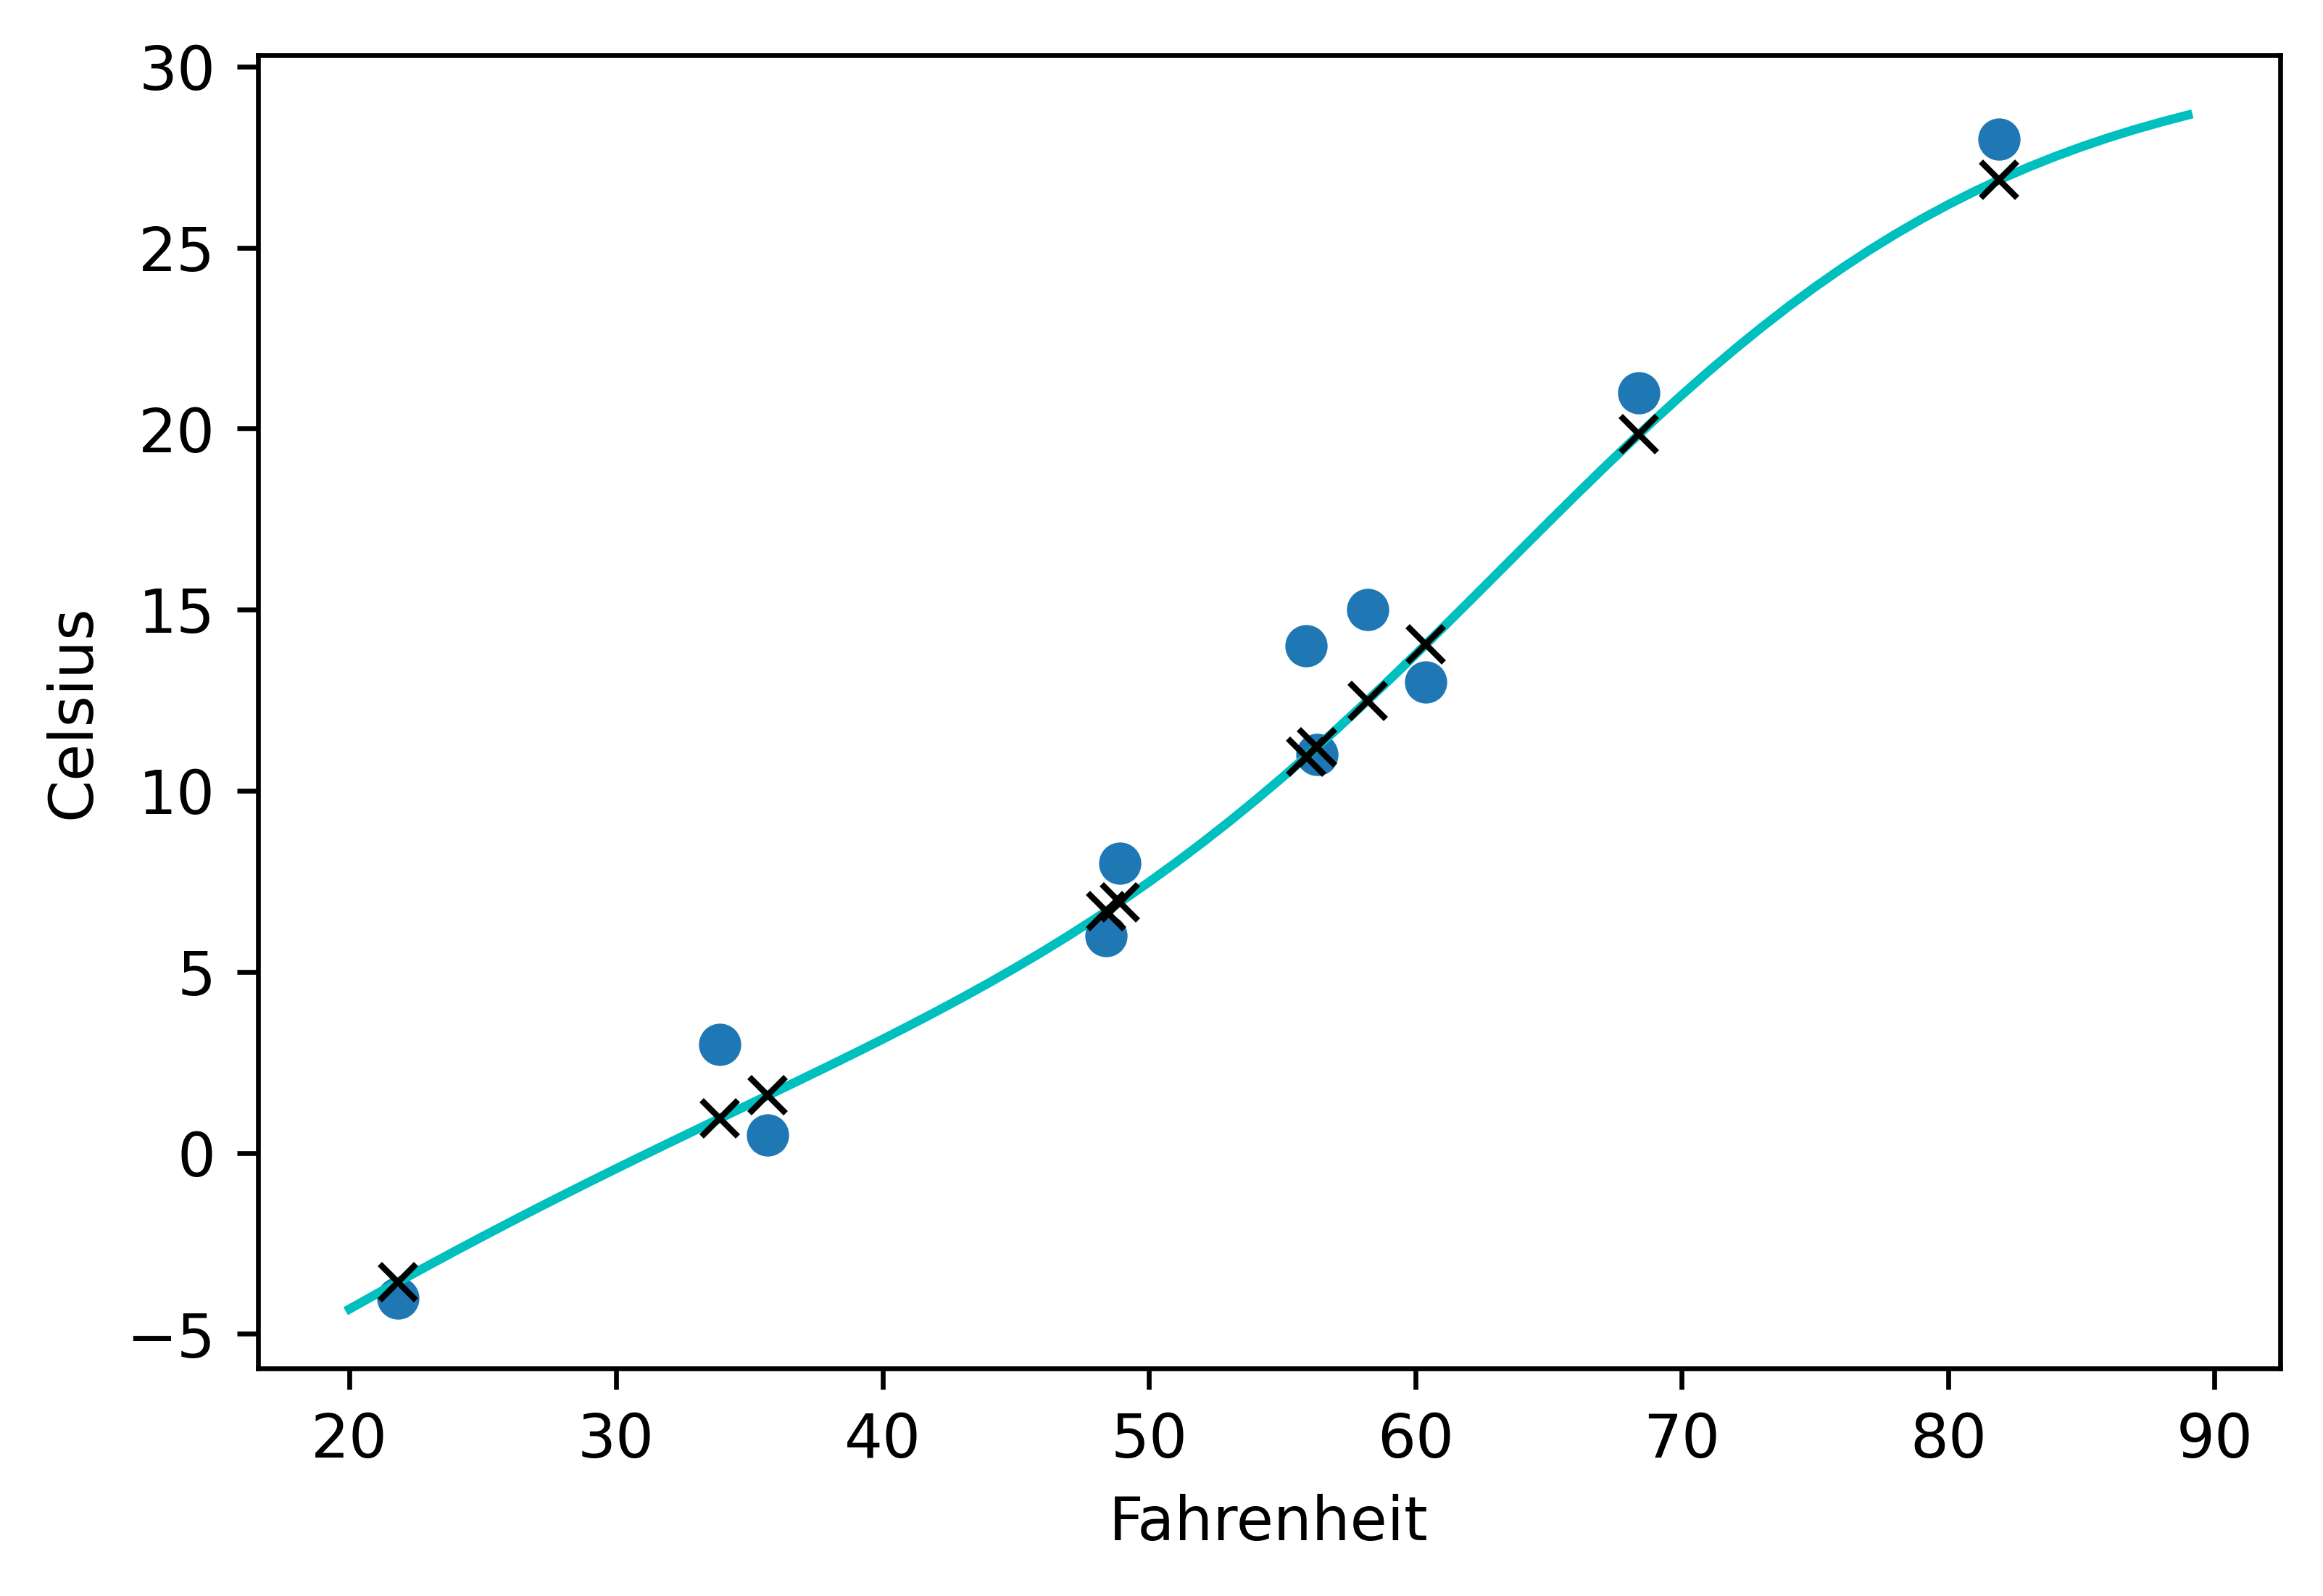

In [71]:
t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')